[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/gomesfg/seniorlabs-challenge-data-science/blob/main/Desafio_DS_Senior_Felipe_Gomes.ipynb)

# Desafio Data Science
**Felipe Eduardo Gomes**\
**Senior Sistemas S/A**

---

**1) Problema:** \
A quantidade de spams (mensagens não solicitadas) que recebemos diariamente, não para de crescer. Os tipos de spam são diversos: anúncios de produtos / web sites, esquemas para ganhar dinheiro rápido, correntes, pornografia e etc.

\

**2) Input:** \
O arquivo [sms_senior.csv](https://github.com/SeniorSA/seniorlabs-challenge/blob/main/sms_senior.csv) contém vários exemplos de mensagens comuns (4827 unidades) e mensagens spams (747 unidades). As mensagens foram submetidas a uma etapa de mineração de texto, com o objetivo de identificar as palavras mais frequentes na base de dados.

Seguem as informações dos atributos do arquivo:

* 1 coluna contendo a mensagem original (Full_Text);
* 149 colunas com valores inteiros que indicam a frequência de uma determinada palavra na mensagem ("got"... "wan");
* 1 coluna contendo a quantidade de palavras frequentes na mensagem (Common_Words_Count);
* 1 coluna contendo a quantidade total de palavras da mensagem (Word_Count);
* 1 coluna contendo a data de recebimento da mensagem (Date);
* 1 coluna que identifica se a mensagem é spam ou não (IsSpam).

\

**3) Primeira Etapa:**
A primeira etapa do seu trabalho consiste em extrair estatísticas desta base de dados:

1. Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: 
gráfico de barras, nuvem de palavras, etc).
2. Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;
3. Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;
4. Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

\

**4) Segunda Etapa:**
A segunda etapa consiste em aplicar um método capaz de classificar automaticamente as mensagens como “comum” e “spam”. Como você considera os resultados encontrados? Justifique.

\

**5) Output:**
Você pode utilizar qualquer linguagem de programação e ferramentas de software para extrair as informações das duas etapas do trabalho. Por fim, descreva o trabalho realizado em um artigo.

Lembre-se de apontar as estatísticas extraídas e de explicar o método de classificação utilizado, como a etapa de treinamento e classificação foram executadas, além dos resultados que foram encontrados.

O modelo parece grande, mas você pode ser bem objetivo. Os códigos fontes ou arquivos utilizados no trabalho deverão ser postados no github, onde o README deve explicar como proceder para executar sua solução.

---



## Importação das bibliotecas

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import string
from wordcloud import WordCloud 
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Descrição do dataset

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df_sms = pd.read_csv('https://raw.githubusercontent.com/gomesfg/seniorlabs-challenge-data-science/main/sms_senior.csv', sep=',', encoding= 'unicode_escape')
df_sms.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no


In [5]:
# Utilização do LabelEncoder da biblioteca sklearn para transformar a feature "IsSpam" de categórico para numérico.
# {'no': 0, 'yes': 1}
le = LabelEncoder()
df_sms['IsSpam_numeric']=le.fit_transform(df_sms['IsSpam'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'no': 0, 'yes': 1}


In [6]:
# Adicionando feature "Month" e "Month_Description" ao dataset
df_sms['Month'] = pd.DatetimeIndex(df_sms['Date']).month
df_sms['Month_Description'] = pd.DatetimeIndex(df_sms['Date']).month_name()

## Distribuição estatística dos dados
Ao realizar uma análise do dataset, podemos observar abaixo que se trata de uma matriz de 5574 linhas e 157 colunas, sendo 153 features do tipo int64 e 4 do tipo object.

In [7]:
df_sms.info()
print(df_sms.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Columns: 157 entries, Full_Text to Month_Description
dtypes: int64(153), object(4)
memory usage: 6.7+ MB
(5574, 157)


Realizei a pesquisa para ver se encontrava atributos com dados faltantes (missing values) ou atributos com dados incorretos, porém todos estavam com valores preenchidos.

In [8]:
df_sms.isna().sum()

Full_Text            0
got                  0
great                0
wat                  0
free                 0
text                 0
txt                  0
win                  0
already              0
dun                  0
say                  0
around               0
dont                 0
think                0
back                 0
hey                  0
like                 0
now                  0
send                 0
still                0
even                 0
friends              0
per                  0
call                 0
claim                0
customer             0
prize                0
mobile               0
gonna                0
home                 0
ive                  0
soon                 0
today                0
tonight              0
want                 0
cash                 0
reply                0
urgent               0
week                 0
won                  0
help                 0
right                0
take                 0
will       

Foi utilizado o método .describe() para criar um resumo básico das principais informações do Dataframe, assim fornecendo uma visão geral das variáveis numéricas.

In [9]:
df_sms.describe()

,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,IsSpam_numeric,Month
count,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.00000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000,5574.000000
mean,0.043057,0.019914,0.017223,0.049874,0.033907,0.029243,0.013097,0.016146,0.009867,0.016505,0.010944,0.052386,0.023681,0.027269,0.019914,0.043775,0.085935,0.034266,0.027628,0.011302,0.010405,0.010585,0.104234,0.020273,0.010405,0.016505,0.024937,0.010405,0.029064,0.013455,0.010585,0.025296,0.010764,0.034625,0.013276,0.025834,0.011661,0.020811,0.013097,0.010585,0.016505,0.022605,0.068712,0.010047,0.014891,0.011123,0.018120,0.009150,0.016505,0.011123,0.017761,0.018120,0.014173,0.030678,0.009150,0.011123,0.028705,0.072659,0.013994,0.008970,0.066021,0.013097,0.015429,0.010226,0.035881,0.015070,0.042878,0.046107,0.012558,0.017940,0.012738,0.010585,0.015429,0.013455,0.024578,0.023502,0.013635,0.014891,0.028166,0.019555,0.029961,0.012917,0.016146,0.018658,0.049516,0.024220,0.014532,0.069968,0.015788,0.022426,0.037316,0.013814,0.010585,0.018479,0.019196,0.027987,0.024399,0.013097,0.008970,0.024040,0.012738,0.042339,0.041084,0.010226,0.015608,0.038034,0.010226,0.013814,0.012199,0.009508,0.020273,0.027808,0.030678,0.010047,0.020632,0.010764,0.008970,0.010585,0.011661,0.009508,0.008970,0.009688,0.020273,0.014173,0.008970,0.013635,0.009508,0.012199,0.013994,0.010944,0.012199,0.010226,0.011482,0.00897,0.012199,0.012738,0.008970,0.013097,0.009508,0.010047,0.012199,0.008970,0.022605,0.016

Frequência de spams

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


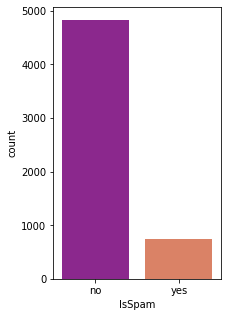

In [10]:
plt.figure(figsize=(3,5))
sns.countplot(df_sms['IsSpam'], order =df_sms.IsSpam.value_counts().index,palette= 'plasma')
plt.show()

# Primeira Etapa

Funções

In [11]:
def process_text(text):
  # Remover stopwords e pontuação, stemming
  stw = set(stopwords.words("english")+ list(string.punctuation))
  cleaned_text = [word for word in text.split() if word not in stw]
  stemmer = SnowballStemmer('english')
  cleaned_text = [stemmer.stem(word) for word in cleaned_text]

  return cleaned_text

In [12]:
def plot_cloud(frequencies):
  wordcloud = WordCloud(max_font_size=50, max_words=100).generate_from_frequencies(frequencies)
  plt.figure(1,figsize=(12, 12))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [26]:
df_sms['formatted_text'] = df_sms['Full_Text']

In [27]:
df_sms['formatted_text'] = df_sms['formatted_text'].apply(process_text)

In [31]:
# Transformar as features de colunas para linhas e fazer o somatório
df = df_sms.iloc[:, 1:148].reset_index()
df_frequencies = df.drop('index', axis=1).sum().reset_index().sort_values(by=0, ascending=False).rename({'index': 'word', 0: 'quantity'}, axis=1)
df_frequencies_dict = df_frequencies.set_index('word').to_dict()['quantity']

## 1) Exibir gráfico as palavras mais frequentes em toda a base de dados (Ex.: gráfico de barras, nuvem de palavras, etc).

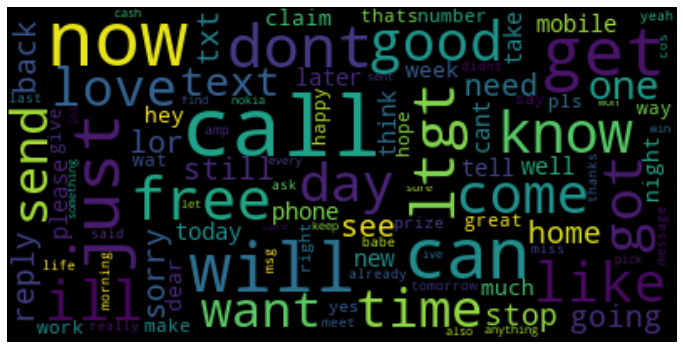

In [32]:
plot_cloud(df_frequencies_dict)

Podemos observar que as cinco palavras que mais aparecem são "call", "now", "can", "get" e "will".

In [34]:
df_frequencies.head(10)

,word,quantity
22,call,581
16,now,479
57,can,405
87,get,390
42,will,383
60,just,368
11,dont,292
3,free,278
84,ltgt,276
67,know,257


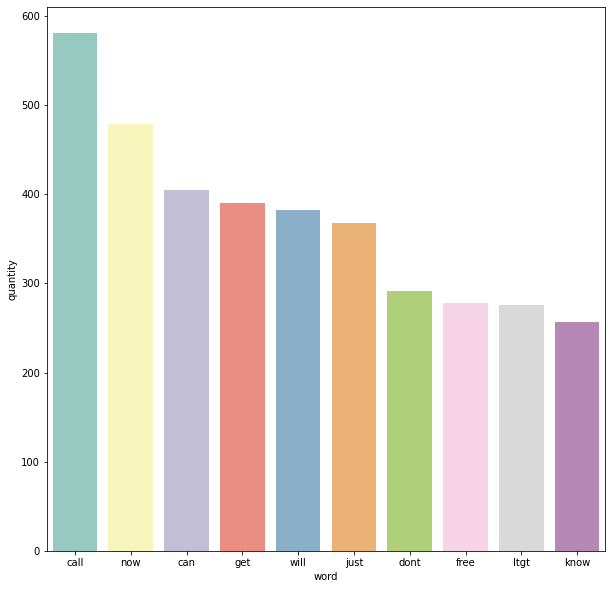

In [35]:
plt.figure(figsize=(10,10))
sns.barplot(data=df_frequencies.head(10), x='word', y='quantity', palette='Set3')
plt.show()

## 2) Exibir gráfico com as quantidades de mensagens comuns e spams para cada mês;

In [39]:
df_sms.head()

,Full_Text,got,great,wat,free,text,txt,win,already,dun,say,around,dont,think,back,hey,like,now,send,still,even,friends,per,call,claim,customer,prize,mobile,gonna,home,ive,soon,today,tonight,want,cash,reply,urgent,week,won,help,right,take,will,wont,message,next.,make,name,yes,feel,thats,way,miss,going,try,first,lor,can,meet,getting,just,lol,really,always,love,amp,ill,know,let,work,sure,wait,yeah,anything,tell,please,thanks,msg,see,pls,need,nokia,tomorrow,hope,ltgt,well,didnt,get,ask,cant,time,morning,place,give,happy,sorry,new,find,year,later,pick,good,come,nice,said,day,money,babe,something,waiting,much,stop,one,late,night,someone,guaranteed,service,buy,box,yet,youre,dear,life,people,cos,things,contact,last,went,sent,chat,gud,thk,keep,also,coming,every,told,sleep,care,mins,phone,number,wish,leave,thing,many,wan,Common_Word_Count,Word_Count,Date,IsSpam,IsSpam_numeric,Month,Month_Description,formatted_text
0,Hey! Congrats 2u2. id luv 2 but ive had 2 go h...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,12,2017-01-01 00:08:00,no,0,1,January,"[hey!, congrat, 2u2., id, luv, 2, ive, 2, go, ..."
1,"came to look at the flat, seems ok, in his 50s...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,23,2017-01-01 00:19:00,no,0,1,January,"[came, look, flat,, seem, ok,, 50s?, is, away,..."
2,Urgent! call 09061749602 from Landline. Your c...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,25,2017-01-01 01:53:00,yes,1,1,January,"[urgent!, call, 09061749602, landline., your, ..."
3,Do you hide anythiing or keeping distance from me,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,2017-01-01 02:14:00,no,0,1,January,"[do, hide, anythi, keep, distanc]"
4,"Actually, my mobile is full of msg. And i m do...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,29,2017-01-01 02:25:00,no,0,1,January,"[actually,, mobil, full, msg., and, work, onli..."


In [74]:
df_sms.loc[(df_sms['Month'] == 1) & (df_sms['IsSpam_numeric'] == 1),'got'].value_counts().sum()


266

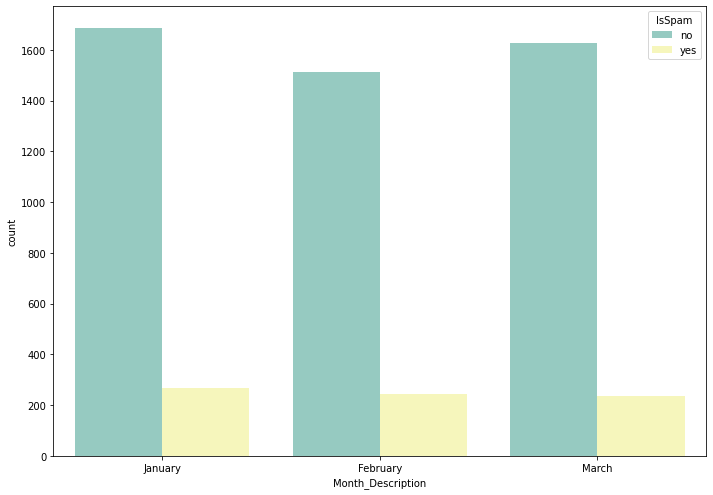

--------------------------------------------------
Janeiro
Spam: 266 mensagens.
Não Spam: 1687 mensagens.
--------------------------------------------------
Fevereiro
Spam: 244 mensagens.
Não Spam: 1512 mensagens.
--------------------------------------------------
Março
Spam: 237 mensagens.
Não Spam: 1628 mensagens.
--------------------------------------------------


In [75]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

sns.countplot(x='Month_Description', hue='IsSpam', palette = "Set3", data=df_sms);
plt.show()

print('-' * 50)
print('Janeiro')
print('Spam:',df_sms.loc[(df_sms['Month'] == 1) & (df_sms['IsSpam_numeric'] == 1),'got'].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 1) & (df_sms['IsSpam_numeric'] == 0),'got'].value_counts().sum(),'mensagens.')
print('-' * 50)
print('Fevereiro')
print('Spam:',df_sms.loc[(df_sms['Month'] == 2) & (df_sms['IsSpam_numeric'] == 1),'got'].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 2) & (df_sms['IsSpam_numeric'] == 0),'got'].value_counts().sum(),'mensagens.')
print('-' * 50)
print('Março')
print('Spam:',df_sms.loc[(df_sms['Month'] == 3) & (df_sms['IsSpam_numeric'] == 1),'got'].value_counts().sum(),'mensagens.')
print('Não Spam:',df_sms.loc[(df_sms['Month'] == 3) & (df_sms['IsSpam_numeric'] == 0),'got'].value_counts().sum(),'mensagens.')
print('-' * 50)


## 3) Calcular o máximo, o mínimo, a média, a mediana, o desvio padrão e a variância da quantidade total de palavras (Word_Count) para cada mês;

In [76]:
df_sms.groupby('Month_Description')['Word_Count'].agg(['max', 'min', 'mean', 'median', 'std', 'var']).T

Month_Description,February,January,March
max,100.000000,190.000000,115.000000
min,2.000000,2.000000,2.000000
mean,16.029043,16.336918,16.285255
median,13.000000,13.000000,12.000000
std,11.042459,12.557171,11.576213
var,121.935908,157.682535,134.008715


## 4) Exibir o dia de cada mês que possui a maior sequência de mensagens comuns (não spam).

In [77]:
df = df_sms.loc[(df_sms['IsSpam_numeric'] == 0)]
df = df.groupby(['Month_Description',pd.to_datetime(df_sms['Date']).dt.normalize()])['Full_Text'].count().reset_index()
df.set_index('Date').groupby('Month_Description')['Full_Text'].agg(['idxmax', 'max']).reset_index().rename({'Month_Description': 'Mês', 'idxmax': 'Dia', 'max':'Quantidade'}, axis=1)

,Mês,Dia,Quantidade
0,February,2017-02-13,72
1,January,2017-01-01,69
2,March,2017-03-08,69


**Resampling** \
Para evitar a situação de desbalanceamento de classes, ou seja, quando existe uma desproporção entre o número de exemplos de uma ou mais classes em relação as demais classes, foi utilizada a técnica de sobreamostragem aleatória (random oversampling), que gera dados sintéticos para a classe minoritária da variável dependente "IsSpam_numeric".


In [78]:
# Contagem das classes
count_class_0, count_class_1 = df_sms.IsSpam_numeric.value_counts()

# Dividir por classe
df_class_0 = df_sms[df_sms['IsSpam_numeric'] == 0]
df_class_1 = df_sms[df_sms['IsSpam_numeric'] == 1]

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_sms_over = pd.concat([df_class_0, df_class_1_over], axis=0)

Representação gráfica da variável dependente "IsSpam_numeric", após aplicação da técnica de oversampling:

Over-sampling aleatório:
0    4827
1    4827
Name: IsSpam_numeric, dtype: int64


[Text(0, 0, '0 - Msg Comum'), Text(0, 0, '1 - Spam')]

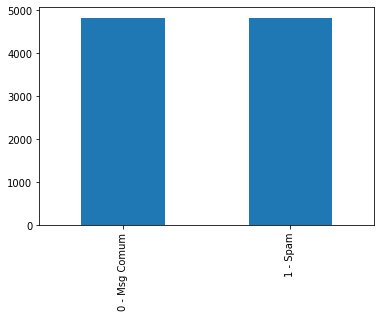

In [79]:
print('Over-sampling aleatório:')
print(df_sms_over.IsSpam_numeric.value_counts())

df_sms_over.IsSpam_numeric.value_counts().plot.bar().set_xticklabels(('0 - Msg Comum', '1 - Spam'))

# Segunda etapa

## Modelos e Funções

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.preprocessing import MinMaxScaler

scoring = {'accuracy': make_scorer(accuracy_score),
           'precision': make_scorer(precision_score, average = 'macro'),
           'recall': make_scorer(recall_score, average = 'macro'),
           'f1': make_scorer(f1_score, average = 'macro')}

def build_models(alg: str):
    model = None
    if alg == 'decision_tree':
        model = GridSearchCV(
            DecisionTreeClassifier(),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'min_samples_leaf': [2, 4, 8],
                'random_state': [42],
                'class_weight': [None, 'balanced']
            },
            scoring=scoring,
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1,
            refit='f1'
        )
    elif alg == 'random_forest':
        model = GridSearchCV(
            RandomForestClassifier(n_estimators=50, n_jobs=-1),
            param_grid={
                'criterion': ['gini', 'entropy'],
                'max_depth': [2, 4, 8],
                'min_samples_split': [2, 4, 8],
                'min_samples_leaf': [2, 4, 8],
                'random_state': [42],
                'class_weight': [None, 'balanced']
            },
            scoring=scoring,
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1,
            refit='f1'
        )
    elif alg == 'naive_bayes':
        model = GridSearchCV(
            MultinomialNB(),
            param_grid={
                'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
            },
            scoring=scoring,
            cv=StratifiedKFold(10),
            n_jobs=-1,
            verbose=1,
            refit='f1'
        )

    return model

Executar modelo

In [81]:
def build_features(df_train, df_test):
    # Aplicando o MinMaxScaler nas variáveis númericas
    numeric_cols = list(df_sms_over.loc[:, 'got':'wan'].columns)

    mm = MinMaxScaler()
    mm_train = mm.fit_transform(df_train[numeric_cols])
    mm_test = mm.transform(df_test[numeric_cols])

    X_train = np.hstack([mm_train])
    X_test = np.hstack([mm_test])

    y_train = df_train.IsSpam_numeric.values
    y_test = df_test.IsSpam_numeric.values

    return X_train, y_train, X_test, y_test

In [82]:
algs = ['random_forest','decision_tree','naive_bayes']
#algs = ['random_forest']
results_matrix = np.zeros(shape=(len(algs), 10, 4, 2)) # shape = (algoritmo, fold, métrica, dataset)
for alg_index, alg in enumerate(algs):
    cv = StratifiedKFold(10, shuffle=True)
    for fold, (train, test) in enumerate(cv.split(df_sms_over, df_sms_over.IsSpam_numeric.values)):
        df_train = df_sms_over.iloc[train]
        df_test = df_sms_over.iloc[test]

        X_train, y_train, X_test, y_test = build_features(df_train, df_test)

        model = build_models(alg)
        model.fit(X_train, y_train)

        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)

        # acurácia, treino e teste
        results_matrix[alg_index, fold, 0, 0] = accuracy_score(y_train, y_pred_train)
        results_matrix[alg_index, fold, 0, 1] = accuracy_score(y_test, y_pred_test)

        p_train, r_train, f_train, _ = precision_recall_fscore_support(y_train, y_pred_train, average='binary')
        p_test, r_test, f_test, _ = precision_recall_fscore_support(y_test, y_pred_test, average='binary')

        # precisão, treino e teste
        results_matrix[alg_index, fold, 1, 0] = p_train
        results_matrix[alg_index, fold, 1, 1] = p_test

        # recall, treino e teste
        results_matrix[alg_index, fold, 2, 0] = r_train
        results_matrix[alg_index, fold, 2, 1] = r_test

        # fscore, treino e teste
        results_matrix[alg_index, fold, 3, 0] = f_train
        results_matrix[alg_index, fold, 3, 1] = f_test
    
    print('-' * 50)
    print(alg)
    print('-' * 50)
    print('Treino - Acurácia', results_matrix[alg_index,:,0,0].mean())
    print('Treino - Precisão', results_matrix[alg_index,:,1,0].mean())
    print('Treino - Sensibilidade (Recall)', results_matrix[alg_index,:,2,0].mean())
    print('Treino - Medida F (F1)', results_matrix[alg_index,:,3,0].mean())
    print('-' * 50)
    print('Teste - Acurácia', results_matrix[alg_index,:,0,1].mean())
    print('Teste - Precisão', results_matrix[alg_index,:,1,1].mean())
    print('Teste - Sensibilidade (Recall)', results_matrix[alg_index,:,2,1].mean())
    print('Teste - Medida F (F1)', results_matrix[alg_index,:,3,1].mean())
    print()
    print(model.best_params_)
    print(model.best_estimator_.get_params())

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
--------------------------------------------------
random_forest
--------------------------------------------------
Treino - Acurácia 0.9075339920375184
Treino - Precisão 0.9576145801111776
Treino - Sensibilidade (Recall) 0.8528185643412234
Treino - Medida F (F1) 0.9021769475646405
--------------------------------------------------
Teste - Acurácia

## Avaliação

Para a avaliação do desempenho de treino serão utilizadas as métricas de acurácia, precisão, sensibilidade (recall), curva de Receiver Operating Characteristic (ROC) e a Area Under the Curve (AUC).

\

A acurácia avalia o percentual de acertos, podendo ser obtida pela divisão entre a quantidade de acertos e o total de entradas. A precisão mede quantas amostras previstas como positivas, são realmente positivas. A sensibilidade (recall) avalia a capacidade do método de detectar com sucesso os resultados classificados como positivos. 

\

A curva ROC é um gráfico que permite avaliar um classificador binário. Essa visualização leva em consideração a taxa de verdadeiros positivos (True Positive Rate - TPR ou sensibilidade) e a taxa de falsos positivos (False Positive Rate - FPR ou especificidade). Na prática, quanto mais próximo do topo do eixo Y melhor é o classificador. A curva ROC pode ser avaliada pela métrica AUC, que calcula a área formada abaixo da curva. Essa métrica indica a probabilidade de duas previsões serem corretamente ranqueadas. A AUC será um valor entre 0 e 1, sendo que quanto maior esse valor, melhor será a capacidade dos modelos de separar classes.

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
--------------------------------------------------
random_forest
AUC=0.8943605405358969
--------------------------------------------------


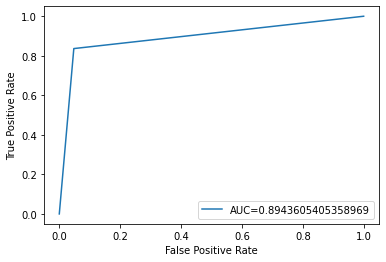

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
--------------------------------------------------
decision_tree
AUC=0.9047017688547546
--------------------------------------------------


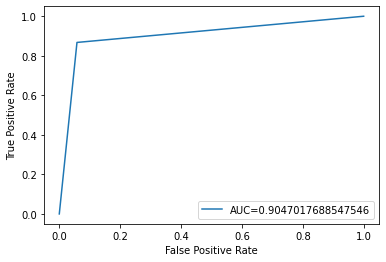

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
--------------------------------------------------
naive_bayes
AUC=0.9202125374775564
--------------------------------------------------


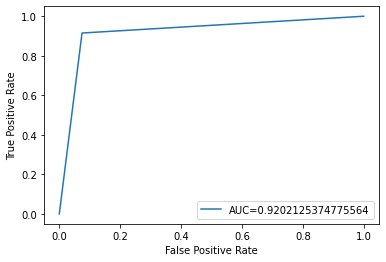

In [83]:
from sklearn import metrics

algs = ['random_forest','decision_tree','naive_bayes']
for alg_index, alg in enumerate(algs):
  cv = StratifiedKFold(10, shuffle=True)
  for fold, (train, test) in enumerate(cv.split(df_sms_over, df_sms_over.IsSpam_numeric.values)):
      df_train = df_sms_over.iloc[train]
      df_test = df_sms_over.iloc[test]

      X_train, y_train, X_test, y_test = build_features(df_train, df_test)

      model = build_models(alg)
      model.fit(X_train, y_train)
      y_predict = model.predict(X_test)

  fpr, tpr, _ = metrics.roc_curve(y_test,  y_predict)
  auc = metrics.roc_auc_score(y_test, y_predict)

  # Plotar Curva ROC
  print('-' * 50)
  print(alg)
  print("AUC="+str(auc))
  print('-' * 50)
  plt.plot(fpr,tpr,label="AUC="+str(auc))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()


Conforme verificado na curva ROC e nas métricas de acurácia, precisão, recall e medida F, o modelo baseado no algoritmo de Nayves Bayes se saiu melhor, portanto iremos utilizá-lo.

Matriz de Confusão - Nayves Bayes

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

cv = StratifiedKFold(10, shuffle=True)
ground_truth = list()
predicted = list()

for fold, (train, test) in enumerate(cv.split(df_sms_over, df_sms_over.IsSpam_numeric.values)):
    df_train = df_sms_over.iloc[train]
    df_test = df_sms_over.iloc[test]

    X_train, y_train, X_test, y_test = build_features(df_train, df_test)

    model = build_models('naive_bayes')
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)

    ground_truth.extend(y_test)
    predicted.extend(y_predict)

print(classification_report(ground_truth, predicted))

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
Fitting 10 folds for each of 8 candidates, totalling 80 fits
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4827
           1       0.89      0.90      0.90      4827

    accuracy                           0.89      9654
   macro avg       0.89      0.89      0.89      9654
weighted avg       0.89      0.89      0.89      9654



<ipython-input-85-dbd098681dac>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=1))


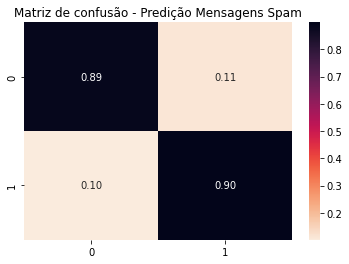

In [85]:
import seaborn as sns

# normalizando a matriz de confusão para visualizar o resultado da sensibilidade (recall)
cm = confusion_matrix(ground_truth, predicted)
cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=1))

plt.title('Matriz de confusão - Predição Mensagens Spam')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='rocket_r')
plt.show()

<ipython-input-86-2476b44efed3>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=0))


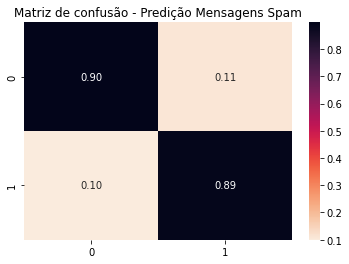

In [86]:
# normalizando a matriz de confusão para visualizar o resultado da precisão
cm = confusion_matrix(ground_truth, predicted)
cm = np.transpose(cm.T / cm.astype(np.float).sum(axis=0))

plt.title('Matriz de confusão - Predição Mensagens Spam')
sns.heatmap(cm, annot=True, fmt='.2f', cmap='rocket_r')
plt.show()

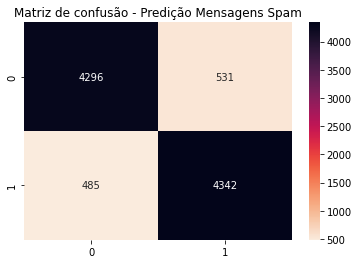

In [87]:
# matriz de confusão sem normalização
cm = confusion_matrix(ground_truth, predicted)

plt.title('Matriz de confusão - Predição Mensagens Spam')
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r')
plt.show()